# Exploration of cleaned nutrition dataset
#### by Jérôme d'Harveng

<a id='table'></a>
## Table of Contents
<ul>
<li><a href="#univariate">Univariate exploration</a></li>
<li><a href="#feature_selection">Feature selection</a></li>
<li><a href="#feature_eng">Feature Engineering</a></li>
<li><a href="#multivariate">Multivariate exploration</a></li>
</ul>

## Loading cleaned dataset

In [1]:
# starting by import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import scipy.stats as st

%matplotlib inline

In [2]:
nutri_data = pd.read_csv('clean_nutri_data.csv', sep=",", encoding='utf_8', low_memory=False)

In [3]:
# test to see if loading worked well
print(nutri_data.shape)
nutri_data.sample(2)

(295693, 40)


,code,product_name,energy_100g,fat_100g,saturated_fat_100g,trans_fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,...,omega_6_fat_100g,omega_9_fat_100g,cholesterol_100g,alcohol_100g,caffeine_100g,fruits_vegetables_nuts_100g,nutrition_grade_fr,nutrition_score_fr_100g,nutrition_score_uk_100g,nulls_grade_fr
285139,8413664511225,Papas,2318.0,33.0,3.40,0.0,55.00,0.80,0.0,6.00,...,0.0,0.0,0.0,0.0,0.0,0.0,c,10,9,1
125254,0713733762434,"Chewy Sweet & Salty Pretzel Bars, Peanut Choco...",1912.0,20.0,7.14,0.0,62.86,25.71,8.6,8.57,...,0.0,0.0,0.0,0.0,0.0,0.0,d,16,16,0


<a id='univariate'></a>
## Univariate Exploration

### Let's start by looking at the distribution of the "grades" and "scores"

#### Distribution of nutrition_grade_fr

In [4]:
# make sure type = Ordered Categorical Type
scores = ['a','b','c','d','e']
ordered_score = pd.api.types.CategoricalDtype(ordered = True,categories = scores)
nutri_data['nutrition_grade_fr'] = nutri_data['nutrition_grade_fr'].astype(ordered_score)

In [5]:
# definition parameters
base_color = sb.color_palette()[0]
data_nutri_no_null = nutri_data.query('nulls_grade_fr == 0') # data without replace null_values for nutrition_grade_fr

In [6]:
data_nutri_no_null.shape

(212829, 40)

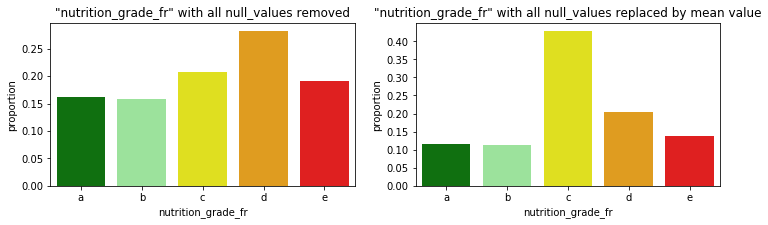

In [7]:
plt.figure(figsize = [12,3])

# Preparation of relative frequencies
# get the proportion taken by most common group for derivation of the tick marks
n_points= nutri_data.shape[0]
n_points_n0 = data_nutri_no_null.shape[0]
max_count = nutri_data.nutrition_grade_fr.value_counts().max()
max_count_n0 = data_nutri_no_null.nutrition_grade_fr.value_counts().max()
max_prop = max_count / n_points
max_prop_n0 = max_count_n0 / n_points_n0

# generate tick mark locations and names
tick_props = np.arange(0,max_prop,0.05)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
tick_props_n0 = np.arange(0,max_prop_n0,0.05)
tick_names_n0 = ['{:0.2f}'.format(v) for v in tick_props_n0]

my_pal = {"a": "g", "b": "lightgreen", "c":"yellow","d":"orange","e":"red"}

# Bar chart on the left: nutri_data WITHOUT lines where null values replace for "nutrition_grade"
plt.subplot(1,2,1)
sb.countplot(data=data_nutri_no_null,x='nutrition_grade_fr',palette=my_pal)
plt.yticks(tick_props_n0 * n_points_n0, tick_names_n0)
plt.ylabel('proportion')
plt.title('"nutrition_grade_fr" with all null_values removed');

# Bar chart on the right: nutri_data WITH lines where null values replace for "nutrition_grade"
plt.subplot(1,2,2)
sb.countplot(data=nutri_data,x='nutrition_grade_fr',palette=my_pal)
plt.yticks(tick_props * n_points, tick_names)
plt.ylabel('proportion')
plt.title('"nutrition_grade_fr" with all null_values replaced by mean value');

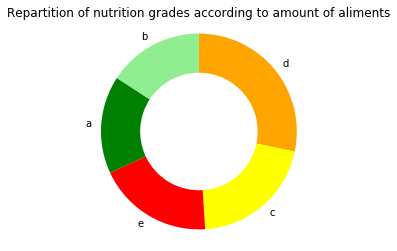

In [8]:
sorted_counts = data_nutri_no_null["nutrition_grade_fr"].value_counts()
colors_pie = ["orange","yellow","red","green","lightgreen"];
plt.pie(sorted_counts, labels=sorted_counts.index, startangle=90,\
       counterclock=False,wedgeprops ={'width':0.4},colors=colors_pie);
plt.axis('square')
plt.title('Repartition of nutrition grades according to amount of aliments');

#### Comments:
> **When null-values omitted** : Categories with nutri-score "a"vs "b" and "c" vs "e" have similar amounts of nutriments. Nutri-score "d" has most nutriments.

> **When null_values replaced** :Without surprise grade "c" has the highest occurence. This is also linked to the fact that we chose in the Cleaning phase the replace the null-values by the mean value. Nutri-scores "a","b" and "c", count a similar number of nutriments. Nutri-score "d" has some more.

#### Distribution of nutrition_score_fr_100g

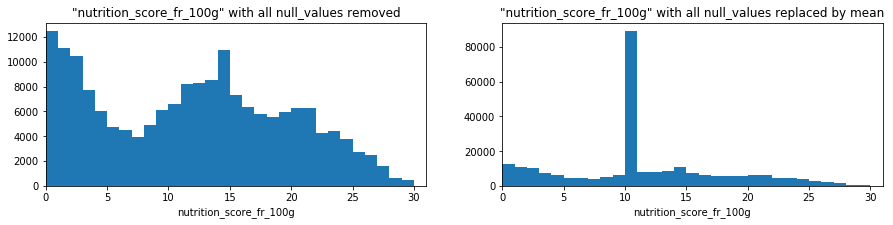

In [9]:
plt.figure(figsize = [15,3])
binsize = 1
bins = np.arange(0, nutri_data['nutrition_score_fr_100g'].max()+binsize, binsize)
# Bar chart on the left: nutri_data WITHOUT lines where null values replace for "nutrition_grade"
plt.subplot(1,2,1)
plt.hist(data = data_nutri_no_null, x = 'nutrition_score_fr_100g', bins = bins)
plt.xlim([0,data_nutri_no_null['nutrition_score_fr_100g'].max()+binsize])
plt.xlabel('nutrition_score_fr_100g')
plt.title('"nutrition_score_fr_100g" with all null_values removed');

# Bar chart on the right: nutri_data WITH lines where null values replace for "nutrition_grade"
plt.subplot(1,2,2)
plt.hist(data = nutri_data, x = 'nutrition_score_fr_100g', bins = bins)
plt.xlim([0,nutri_data['nutrition_score_fr_100g'].max()+binsize])
plt.xlabel('nutrition_score_fr_100g')
plt.title('"nutrition_score_fr_100g" with all null_values replaced by mean');

> **Distribution nutrition_score_fr**: we observe a bi-modal distribution (round 0 and 15), corresponding to the "nutrition_grade_fr" categories B and D.

In [10]:
# some pre-work
nutri_headers = nutri_data.columns.values.tolist()
main_info = ['fat_100g','carbohydrates_100g','fiber_100g','proteins_100g','salt_100g',\
           'calcium_100g','iron_100g']
main_6 = ['fat_100g','carbohydrates_100g','fiber_100g','proteins_100g','salt_100g','fruits_vegetables_nuts_100g']

minerals = ['calcium_100g','iron_100g','magnesium_100g','potassium_100g','zinc_100g']
vitamines = [i for i in nutri_headers if i.startswith("vitamin_")]

### Let's now have a look at the distribution of the "energy_100g"

##### For the distribution of "energy_100g" we'll focus only on the points that aren't equal to 0

In [11]:
# for the scatter plots we'll focus data where "nutrition_grade_fr" and "energy_100g" weren't null 
df_study = data_nutri_no_null.query('energy_100g > 0')

In [12]:
# only the values different from 0
energy_non_zero = nutri_data.query('energy_100g > 0')
energy_non_zero.energy_100g.describe()

count    242005.000000
mean       1136.110129
std         757.834295
min           0.020000
25%         418.000000
50%        1117.000000
75%        1674.000000
max        3556.000000
Name: energy_100g, dtype: float64

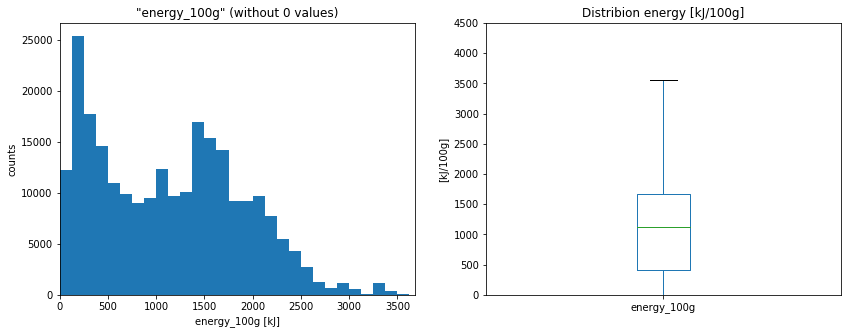

In [13]:
plt.figure(figsize = [14,5])

plt.subplot(1,2,1)

binsize = 125
bins = np.arange(0, energy_non_zero['energy_100g'].max()+binsize, binsize)
plt.hist(data = energy_non_zero, x = 'energy_100g', bins = bins)
plt.xlim([0,energy_non_zero['energy_100g'].max()+binsize])
plt.xlabel('energy_100g [kJ]')
plt.ylabel("counts")
plt.title('"energy_100g" (without 0 values)');

plt.subplot(1,2,2)
energy_non_zero['energy_100g'].plot(kind='box')
plt.ylim([0,4500])
plt.ylabel('[kJ/100g]')
plt.title("Distribion energy [kJ/100g]");

#### Comments:
> Distribution seems bi-modal, with first peak round 125-250kJ and the second round 1500-1625kJ

> 50% of the observations is lower than 1120kJ and 75% lower than 1674kJ

### What's the distribution of the main nutriments/100g?

In [14]:
def draw_hist_100g(df,list_var,n_rows,n_cols,binsize,ylog=False,xmax=100):
    plt.figure(figsize = [20,20])
    bins = np.arange(0,100+binsize, binsize)
    ticks = [1,10,100,100,10000,100000]
    labels = ['{}'.format(val) for val in ticks]
    
    for i,var_name in enumerate(list_var):
        plt.subplot(n_rows,n_cols,i+1) 
        plt.hist(data = df, x = var_name, bins = bins)
        plt.xlim([0,xmax])
        if ylog:
            plt.yscale('log')
            plt.yticks(ticks,labels)
        plt.ylim()
        plt.title("Distribution of " + var_name + " [g/100g]")

In [15]:
def draw_box_100g(df,list_var,n_rows,n_cols,ymax=100):
    plt.figure(figsize = [20,20])
    
    for i,var_name in enumerate(list_var):
        plt.subplot(n_rows,n_cols,i+1) 
        df[var_name].plot(kind='box')
        plt.ylim([0,ymax])
        plt.title("Distribution of " + var_name + " [g/100g]")

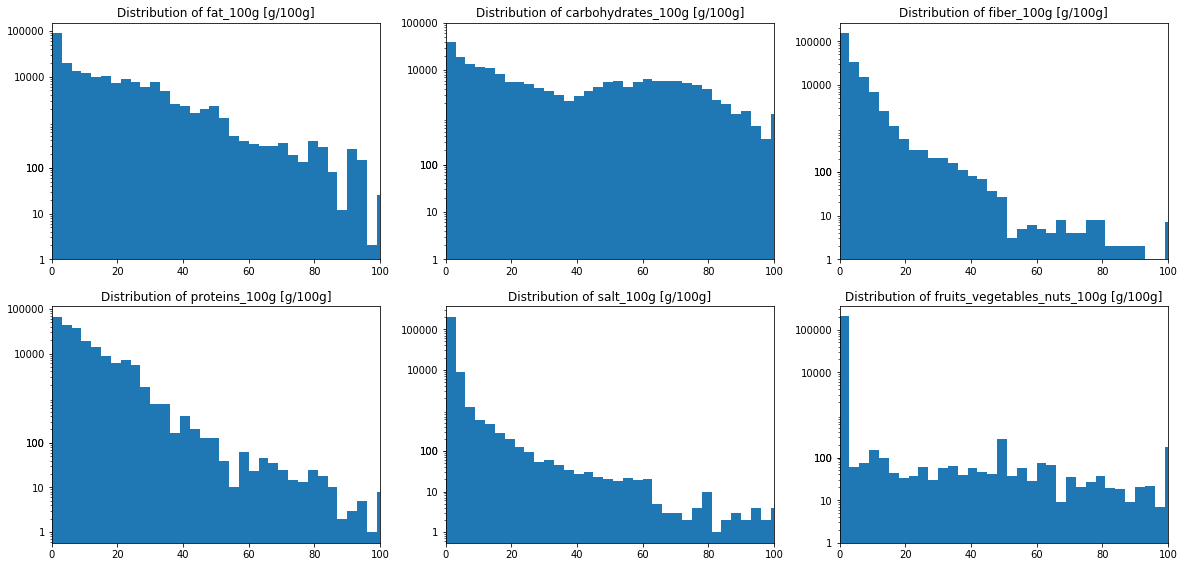

In [16]:
draw_hist_100g(df_study,main_6,4,3,3,True)

In [17]:
df_study[main_6].describe()

,fat_100g,carbohydrates_100g,fiber_100g,proteins_100g,salt_100g,fruits_vegetables_nuts_100g
count,210790.000000,210790.000000,210790.000000,210790.000000,210790.000000,210790.000000
mean,12.035542,30.590104,2.443733,7.701131,1.112583,0.401110
std,15.224929,28.453128,4.226601,7.898178,2.695389,5.061499
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.003500,4.900000,0.000000,2.000000,0.101600,0.000000
50%,5.360000,19.800000,1.000000,5.650000,0.645160,0.000000
75%,20.000000,57.000000,3.300000,10.710000,1.348740,0.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


#### Comments:
> - The distribution of fat, fiber, proteins and salt per 100g seems Right-skewed.
> - The distribution of the carbohydrates and fruit/vegetalbes/nuts per 100g seems to be quite uniform

### And the distribution of minerals?

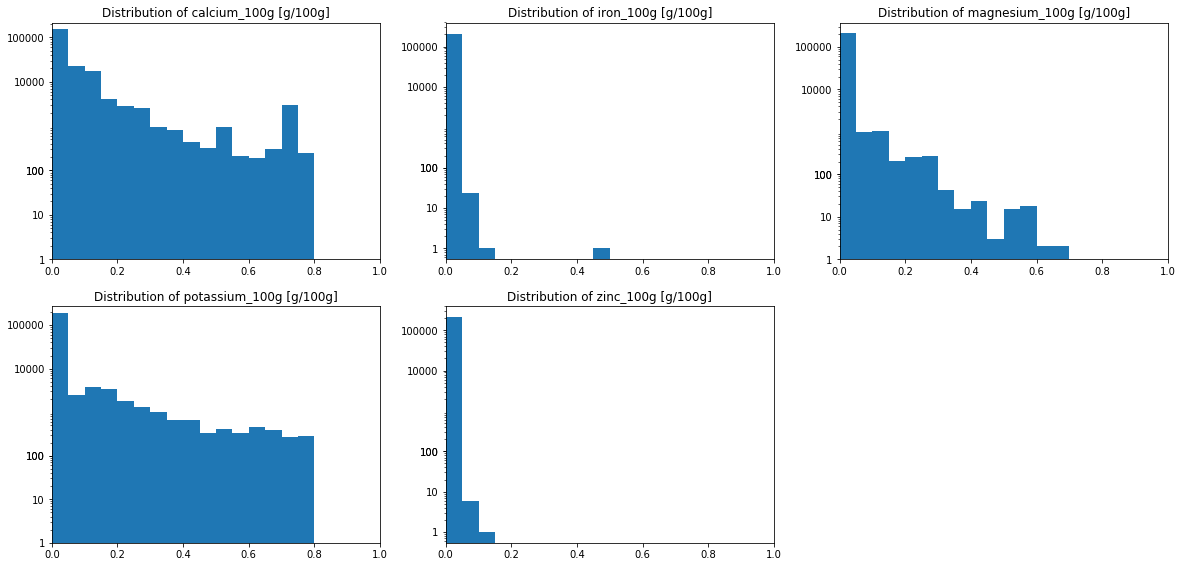

In [18]:
draw_hist_100g(df_study,minerals,4,3,0.05,True,1)

#### Comments:
> Very few aliments contain iron or zinc

In [19]:
df_study[minerals].describe()

,calcium_100g,iron_100g,magnesium_100g,potassium_100g,zinc_100g
count,210790.000000,210790.000000,210790.000000,210790.000000,210790.000000
mean,0.051262,0.001065,0.002139,0.020971,0.000062
std,0.117848,0.002746,0.019978,0.085947,0.000801
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.060000,0.001290,0.000000,0.000000,0.000000
max,0.789000,0.456000,0.667000,0.794000,0.100000


### A closer look to the distribution of vitamines/100g?

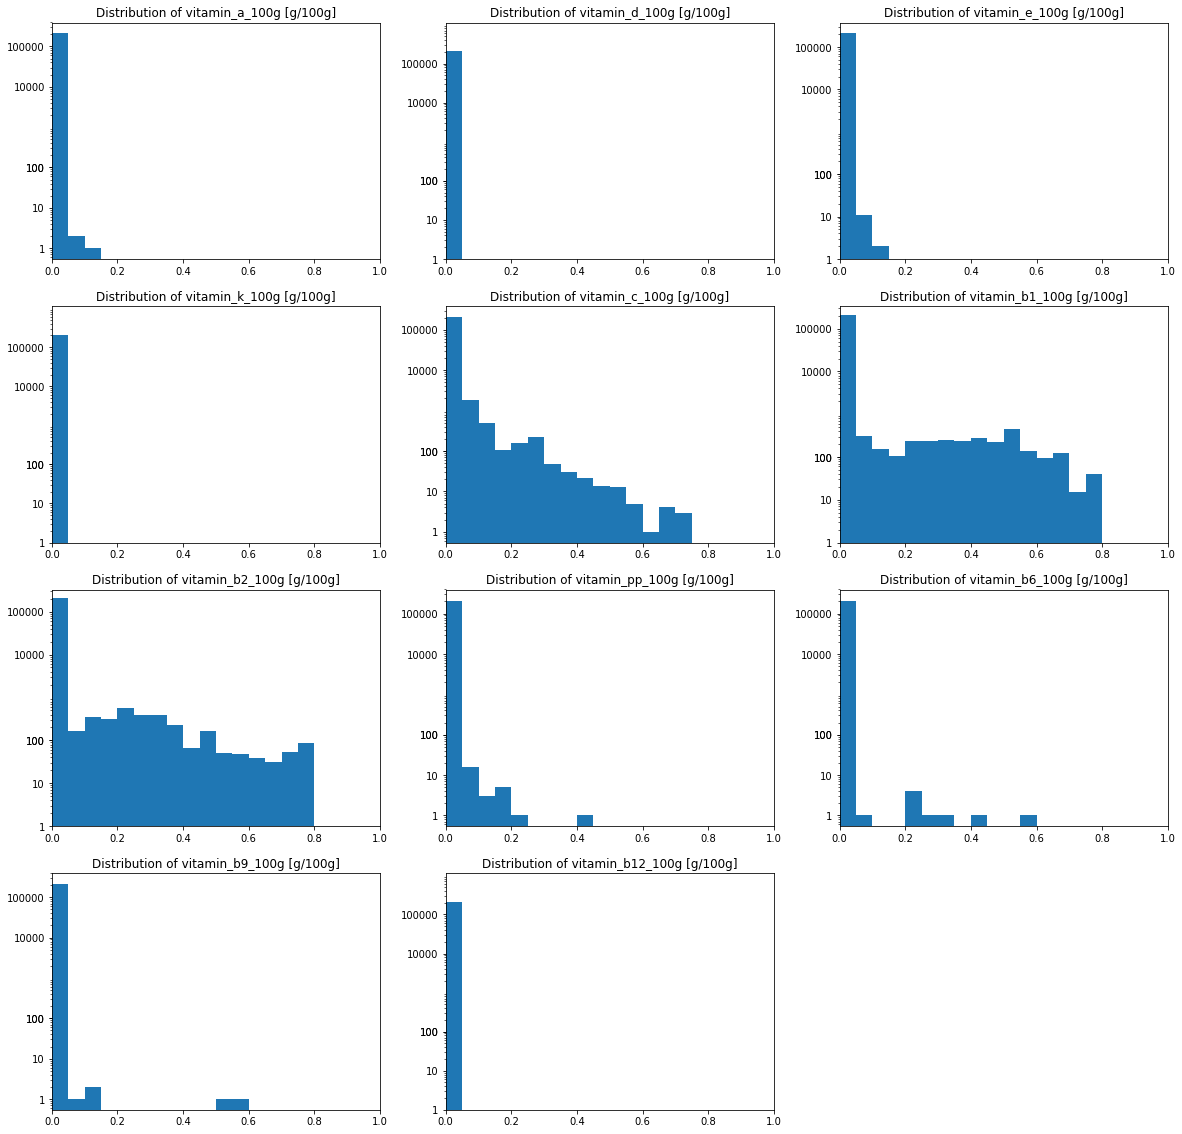

In [20]:
draw_hist_100g(df_study,vitamines,4,3,0.05,True,1)

In [21]:
df_study[vitamines].describe()

,vitamin_a_100g,vitamin_d_100g,vitamin_e_100g,vitamin_k_100g,vitamin_c_100g,vitamin_b1_100g,vitamin_b2_100g,vitamin_pp_100g,vitamin_b6_100g,vitamin_b9_100g,vitamin_b12_100g
count,210790.000000,2.107900e+05,210790.000000,2.107900e+05,210790.000000,210790.000000,210790.000000,210790.000000,210790.000000,210790.000000,2.107900e+05
mean,0.000076,6.554515e-08,0.000041,5.647090e-07,0.003495,0.005265,0.004265,0.000272,0.000030,0.000008,2.025132e-07
std,0.000497,8.040418e-07,0.000978,7.445378e-05,0.018637,0.048189,0.039629,0.002195,0.002095,0.001733,7.383912e-05
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
50%,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
75%,0.000013,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
max,0.120000,1.000000e-04,0.137000,3.340000e-02,0.732000,0.798000,0.790698,0.400000,0.600000,0.600000,3.390000e-02


#### Comments:
>  Vitamines C, B1, B2 and PP are from far most present in the aliments of this dataset

<a id='feature_selection'></a>
## Feature Selection

### Identify highly correlated features

In [22]:
# Source Chris Alban's page
# https://chrisalbon.com/machine_learning/feature_selection/drop_highly_correlated_features/
# Create correlation matrix
corr_matrix = df_study.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

In [23]:
to_drop

['sodium_100g', 'nutrition_score_uk_100g']

#### Comments:
> - after computing the correlation matrix and putting a threshold at 0.9, we came to the conclusion that
'sodium_100g' and 'nutrition_score_uk_100g' could be deleted.
> - This si because 'sodium_100g' is highly correlated with 'salt_100g' and 'nutrition_score_uk_100g' is higly correlated with 'nutrition_score_fr_100g'

### Random Forest for selecting

In [24]:
main_nutriments = ['fat_100g','saturated_fat_100g','trans_fat_100g','carbohydrates_100g','fiber_100g','proteins_100g',\
                   'sodium_100g','salt_100g','fruits_vegetables_nuts_100g']

In [25]:
# Import `RandomForestClassifier`
from sklearn.ensemble import RandomForestClassifier

# Isolate Data, class labels and column values
X = df_study[main_nutriments]
Y = df_study['nutrition_score_fr_100g']
names = X.columns.values

# Build the model
rfc = RandomForestClassifier()

# Fit the model
rfc.fit(X, Y);

In [26]:
# Print the results
print("Features sorted by their score:")
print(sorted(zip( map(lambda x: round(x, 4), rfc.feature_importances_), names), reverse=True))

Features sorted by their score:
[(0.1826, 'carbohydrates_100g'), (0.156, 'proteins_100g'), (0.1469, 'saturated_fat_100g'), (0.1319, 'salt_100g'), (0.1296, 'sodium_100g'), (0.1295, 'fat_100g'), (0.1175, 'fiber_100g'), (0.0032, 'fruits_vegetables_nuts_100g'), (0.0028, 'trans_fat_100g')]


In [27]:
# Isolate Data, class labels and column values
X_minerals = df_study[minerals]
names_minerals = X_minerals.columns.values

# Build the model
rfc_minerals = RandomForestClassifier()

# Fit the model
rfc_minerals.fit(X_minerals, Y);

In [28]:
# Print the results
print("Features sorted by their score:")
print(sorted(zip( map(lambda x: round(x, 4), rfc_minerals.feature_importances_), names_minerals), reverse=True))

Features sorted by their score:
[(0.3706, 'iron_100g'), (0.3568, 'calcium_100g'), (0.2079, 'potassium_100g'), (0.0397, 'magnesium_100g'), (0.0249, 'zinc_100g')]


In [29]:
# Isolate Data, class labels and column values
X_vitamines = df_study[vitamines]
names_vitamines = X_vitamines.columns.values

# Build the model
rfc_vitamines = RandomForestClassifier()

# Fit the model
rfc_vitamines.fit(X_vitamines, Y);

In [30]:
# Print the results
print("Features sorted by their score:")
print(sorted(zip( map(lambda x: round(x, 4), rfc_vitamines.feature_importances_), names_vitamines), reverse=True))

Features sorted by their score:
[(0.4046, 'vitamin_a_100g'), (0.3, 'vitamin_c_100g'), (0.056, 'vitamin_pp_100g'), (0.056, 'vitamin_b2_100g'), (0.0511, 'vitamin_b1_100g'), (0.0353, 'vitamin_b9_100g'), (0.0326, 'vitamin_d_100g'), (0.0274, 'vitamin_b6_100g'), (0.0161, 'vitamin_b12_100g'), (0.0131, 'vitamin_e_100g'), (0.0077, 'vitamin_k_100g')]


#### Comments:
> We can drop the highly **correlated features** : 'sodium_100g', 'nutrition_score_uk_100g'

> From the **Random Forest** select, we decided to keep:
> - salt_100g, carbohydrates_100g, proteins_100g, fat_100g, saturated_fat_100g, fiber_100g
> - iron_100g, calcium_100g, potassium_100g
> - vitamin_a_100g, vitamin_c_100g

<a id='feature_eng'></a>
## Feature Engineering

### Ratio saturated fat / total fat

In [31]:
# Here we'll use rows were fat_100_g isn't zero and saturated_fat_100g <= fat_100g
print(df_study.query('(fat_100g == 0) & (saturated_fat_100g > fat_100g)')[['fat_100g','saturated_fat_100g']].count())
print(df_study.query('saturated_fat_100g > fat_100g')['fat_100g'].count())
df_study_ratio_fat = df_study.query('(fat_100g != 0) & (saturated_fat_100g <= fat_100g) ')

fat_100g              15118
saturated_fat_100g    15118
dtype: int64
15313


In [32]:
df_study_ratio_fat['ratio_saturated_fat'] = 100*(df_study_ratio_fat['saturated_fat_100g'].divide(df_study_ratio_fat['fat_100g']))

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [33]:
df_study_ratio_fat.query('code=="0000000016087"')[['saturated_fat_100g','fat_100g','ratio_saturated_fat']]

,saturated_fat_100g,fat_100g,ratio_saturated_fat
3,5.36,57.14,9.380469


In [34]:
df_study_ratio_fat.ratio_saturated_fat.describe()

count    157901.000000
mean         34.213369
std          25.789877
min           0.000000
25%          12.495625
50%          33.293698
75%          56.944444
max         100.000000
Name: ratio_saturated_fat, dtype: float64

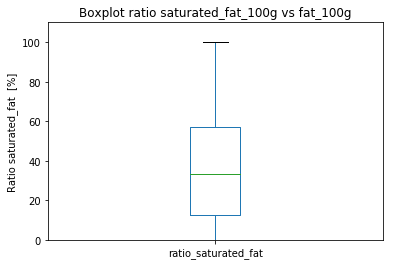

In [35]:
df_study_ratio_fat['ratio_saturated_fat'].plot(kind='box')
plt.ylim([0,110])
plt.ylabel('Ratio saturated_fat  [%]')
plt.title('Boxplot ratio saturated_fat_100g vs fat_100g');

#### Comments:
> - this ratio is inspired from nutrition study of Hercberg
> - it allows to differentiate fats coming from oils, fresh cream, butter.
> - those have are above 10% generally for this ratio
> - 25% is lower than 12.49% => Less than 25% of the aliments is under the threshold of 10%

<a id='multivariate'></a>
## Multivariate Exploration

In [36]:
# after Feature Selection
main_scatter = ['fat_100g','saturated_fat_100g','carbohydrates_100g','proteins_100g','fiber_100g','salt_100g',\
          'energy_100g','nutrition_score_fr_100g']
vitamines_scatter = ['vitamin_a_100g','vitamin_c_100g', 'vitamin_b1_100g', 'vitamin_b2_100g']
mineral_scatter = ['iron_100g','potassium_100g','calcium_100g']

### PairGrid Scatterplots (Quantitative vs Quantitative)

##### Fat, carbohydrates, fiber, proteins, salt, energy and nutrition_score

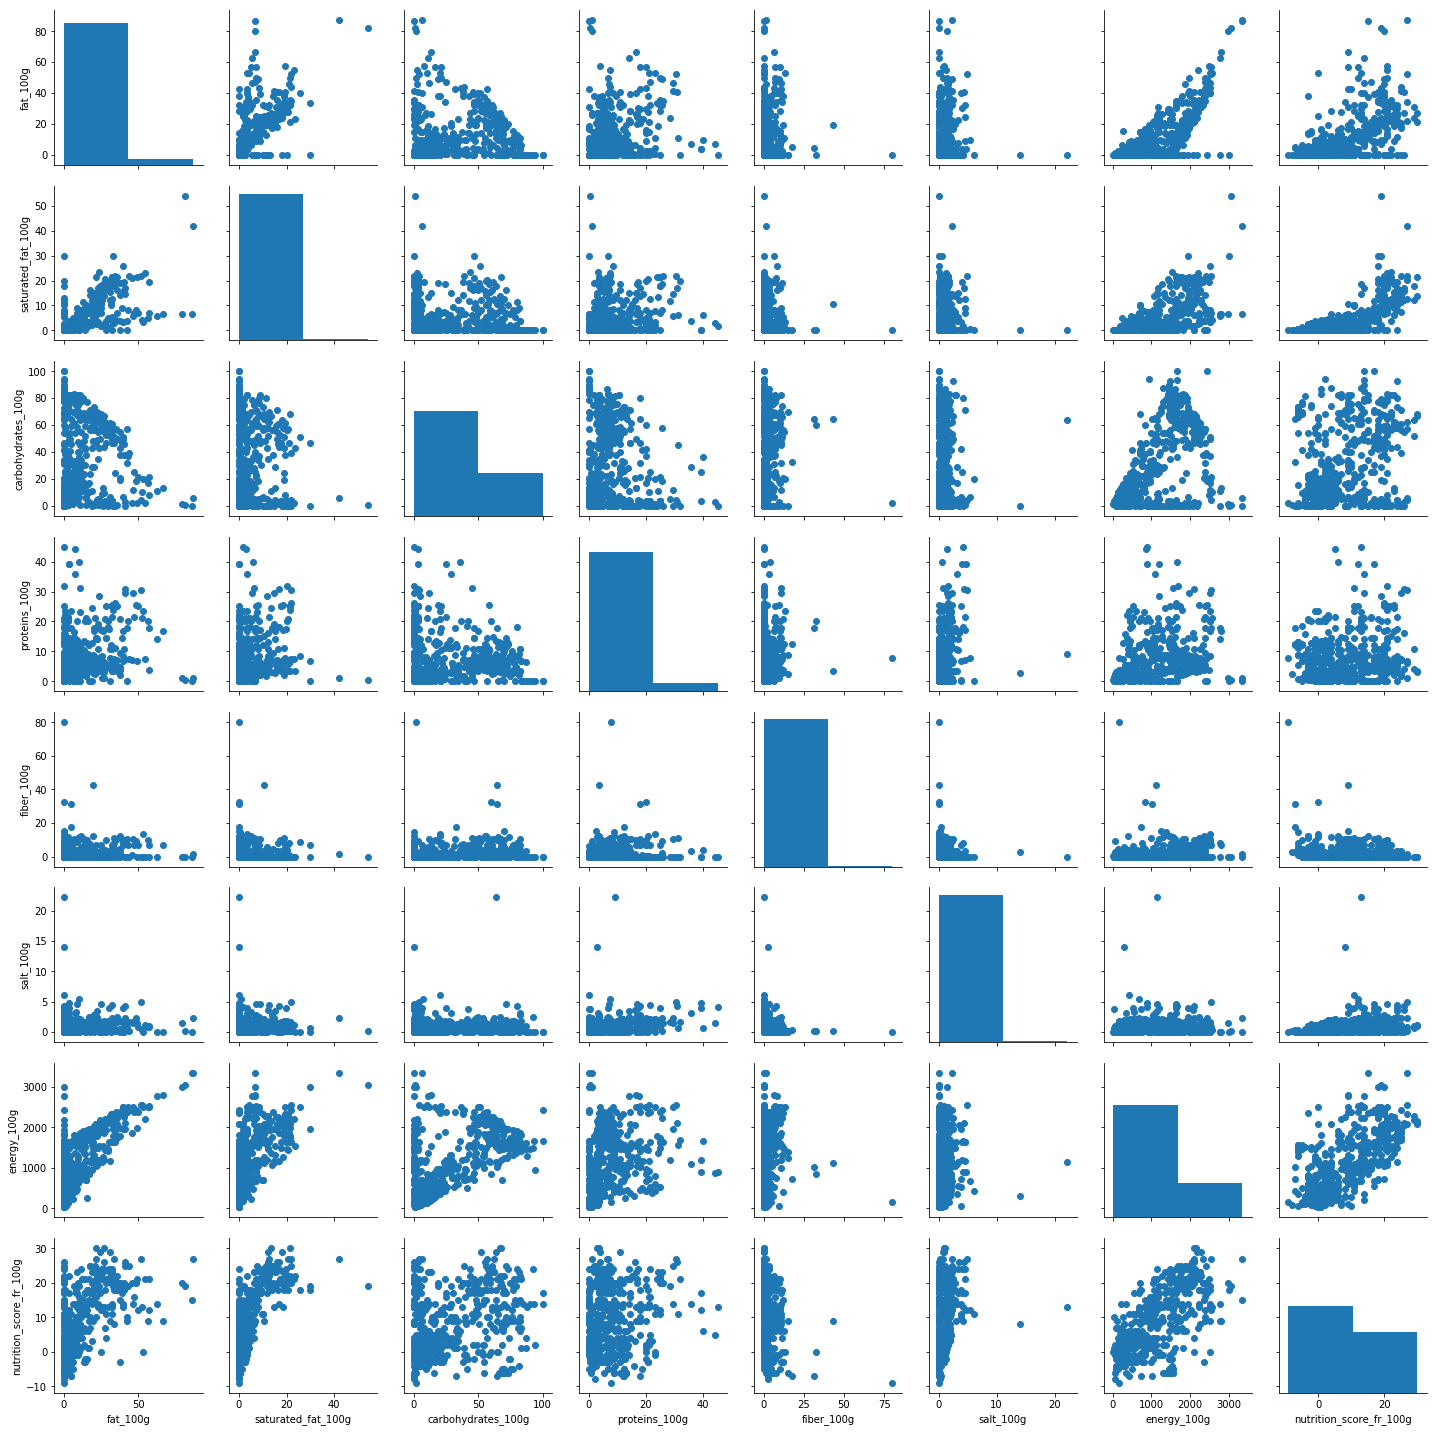

In [37]:
# plot matrix: sample 500 aliments so that plots are clearer and
# they render faster
df_samp = df_study.sample(500)

g = sb.PairGrid(data=df_samp, vars=main_scatter)
g = g.map_diag(plt.hist,bins=2)
g.map_offdiag(plt.scatter);

##### Pearson coefficient to look for possible Linear Correlation

In [38]:
print("Pearson coefficient : energy vs fat")
print(st.pearsonr(df_study.energy_100g, df_study.fat_100g)[0])
print("Pearson coefficient: energy vs nutrition_score_fr")
print(st.pearsonr(df_study.energy_100g, df_study.nutrition_score_fr_100g)[0])
print("Pearson coefficient: fat vs nutrition_score_fr")
print(st.pearsonr(df_study.fat_100g, df_study.nutrition_score_fr_100g)[0])

print("Pearson coefficient: energy vs carbohydrates")
print(st.pearsonr(df_study.energy_100g, df_study.carbohydrates_100g)[0])
print("Pearson coefficient: carbohydrates vs fat")
print(st.pearsonr(df_study.carbohydrates_100g, df_study.fat_100g)[0])
print("Pearson coefficient: proteins vs nutrition_score_fr")
print(st.pearsonr(df_study.proteins_100g, df_study.nutrition_score_fr_100g)[0])

Pearson coefficient : energy vs fat
0.7185305013820454
Pearson coefficient: energy vs nutrition_score_fr
0.6467226037745549
Pearson coefficient: fat vs nutrition_score_fr
0.5459696660349651
Pearson coefficient: energy vs carbohydrates
0.5124539642322048
Pearson coefficient: carbohydrates vs fat
0.028679456986902434
Pearson coefficient: proteins vs nutrition_score_fr
0.10224625305074221


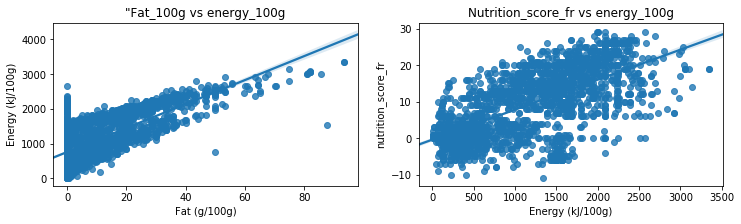

In [39]:
# Sampling df_study, to have a more visual aspect
sample_study = df_study.sample(2000)

plt.figure(figsize = [12,3])

# Bar chart on the left: nutri_data WITHOUT lines where null values replace for "nutrition_grade"
plt.subplot(1,2,1)
sb.regplot(data=sample_study,x='fat_100g',y='energy_100g')
plt.xlabel('Fat (g/100g)')
plt.ylabel('Energy (kJ/100g)')
plt.title('"Fat_100g vs energy_100g');

# Bar chart on the right: nutri_data WITH lines where null values replace for "nutrition_grade"
plt.subplot(1,2,2)
sb.regplot(data=sample_study,x='energy_100g',y='nutrition_score_fr_100g')
plt.xlabel('Energy (kJ/100g)')
plt.ylabel('nutrition_score_fr')
plt.title('Nutrition_score_fr vs energy_100g');

#### Comments:
> Looking at the scatterplots and the Pearson coefficients, there seems to be some linear correlation between "energy" vs "fat" and "energy" vs "nutrition_score_fr". As for those 2 pairs the Pearson coefficient > 0.5. 

##### Vitamines

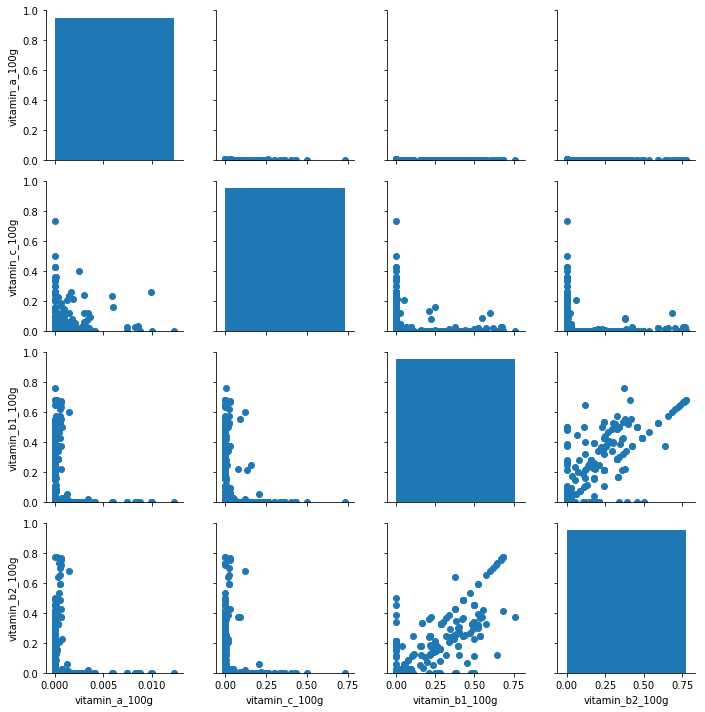

In [40]:
# plot matrix: sample 500 aliments so that plots are clearer and
# they render faster
df_samp = df_study.sample(10000)

g = sb.PairGrid(data=df_samp, vars=vitamines_scatter)
g = g.map_diag(plt.hist,bins=1)
g.set(ylim=(0, None))
g.map_offdiag(plt.scatter);

##### Pearson coefficient to look for possible Linear Correlation

In [41]:
print("Pearson coefficient: vitamin_b1_100g vs vitamin_b2_100g")
print(st.pearsonr(df_study.vitamin_b1_100g, df_study.vitamin_b2_100g)[0])

Pearson coefficient: vitamin_b1_100g vs vitamin_b2_100g
0.8199325296033403


#### Comments:
> vitamin_b1_100g and vitamin_b2_100g seems to be linearly correlated

##### Minerals

In [42]:
df_study[mineral_scatter].describe()

,iron_100g,potassium_100g,calcium_100g
count,210790.000000,210790.000000,210790.000000
mean,0.001065,0.020971,0.051262
std,0.002746,0.085947,0.117848
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.001290,0.000000,0.060000
max,0.456000,0.794000,0.789000


### Violinplots (Qualitative vs Quantitative)

In [43]:
violin_featues = ['fat_100g', 'carbohydrates_100g', 'energy_100g']

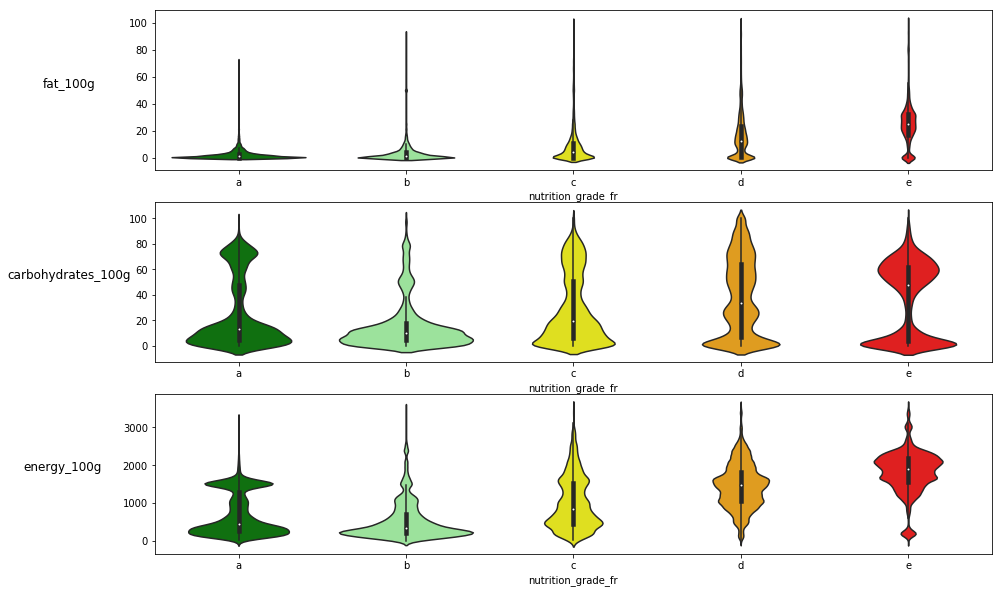

In [44]:
fig, ax = plt.subplots(ncols = 1, nrows = 3 , figsize = [15,10])

for i in range(len(violin_featues)):    
    var = violin_featues[i]   
    # Make a dictionary with one specific color per group:
    my_pal = {"a": "g", "b": "lightgreen", "c":"yellow","d":"orange","e":"red"}
    sb.violinplot(data = df_study, x = 'nutrition_grade_fr', y = var, ax = ax[i],palette=my_pal)
    ax[i].set_ylabel(var, rotation=0, fontsize=12, labelpad=60)

#### Comments:
> - Fat: grades 'a','b','c' are uni-modal from grade 'd' => bi-modal. So for grade 'd' and 'e' more aliments with high salt content
> - Carbohydrates: grades 'a' and 'b' for big majority have lower amount of carbs. Categories 'd' and 'e', have higher proportion of higher content in carbohydrates. Grade 'e' is clearly bi-modal
> - Energy: grades 'd' and 'e' have higher proportion of high energy
> - Nutrition_score_fr_100g: we see the repartition according to the grades.

### Boxplots per nutrition_grade_fr

#### energy_100g

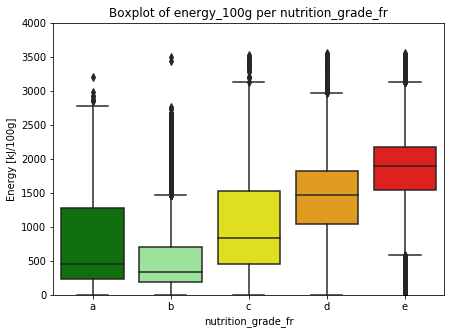

In [45]:
plt.figure(figsize = [7,5])
my_pal = {"a": "g", "b": "lightgreen", "c":"yellow","d":"orange","e":"red"}
sb.boxplot(data = df_study, x = 'nutrition_grade_fr', y = 'energy_100g', palette=my_pal)
plt.ylim(0,4000)
plt.ylabel('Energy [kJ/100g]')
plt.title('Boxplot of energy_100g per nutrition_grade_fr');

In [46]:
df_study.groupby('nutrition_grade_fr').energy_100g.median()

nutrition_grade_fr
a     448.0
b     331.0
c     837.0
d    1464.0
e    1891.0
Name: energy_100g, dtype: float64

#### Comments:
>  we observe that when going towards grade 'e', so less healthy, we have an increase of the median energy level.

#### fat_100g

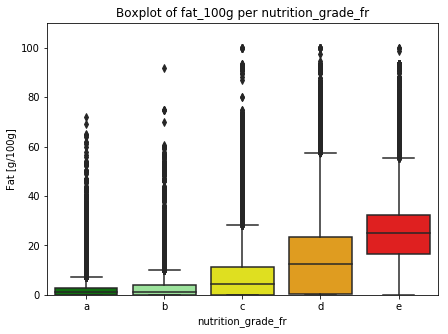

In [47]:
plt.figure(figsize = [7,5])
my_pal = {"a": "g", "b": "lightgreen", "c":"yellow","d":"orange","e":"red"}
sb.boxplot(data = df_study, x = 'nutrition_grade_fr', y = 'fat_100g', palette=my_pal)
plt.ylim(0,110)
plt.ylabel('Fat [g/100g]')
plt.title('Boxplot of fat_100g per nutrition_grade_fr');

In [48]:
df_study.groupby('nutrition_grade_fr').fat_100g.median()

nutrition_grade_fr
a     1.06
b     1.22
c     4.46
d    12.50
e    25.00
Name: fat_100g, dtype: float64

#### Comments:
>  we observe that when going towards grade 'e', so less healthy, we have an increase of the median fat level.

#### saturated_fat_100g

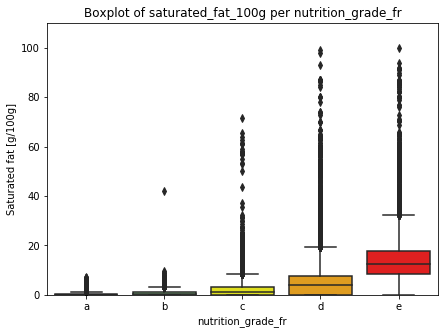

In [49]:
plt.figure(figsize = [7,5])
sb.boxplot(data = df_study, x = 'nutrition_grade_fr', y = 'saturated_fat_100g', palette=my_pal)
plt.ylim(0,110)
plt.ylabel('Saturated fat [g/100g]')
plt.title('Boxplot of saturated_fat_100g per nutrition_grade_fr');

In [50]:
df_study.groupby('nutrition_grade_fr').saturated_fat_100g.median()

nutrition_grade_fr
a     0.00
b     0.20
c     1.30
d     4.17
e    12.50
Name: saturated_fat_100g, dtype: float64

#### Comments:
>  we observe that when going towards grade 'e', so less healthy, we have an increase of the median saturated fat level.

#### ratio saturated_fat_100g / fat_100g

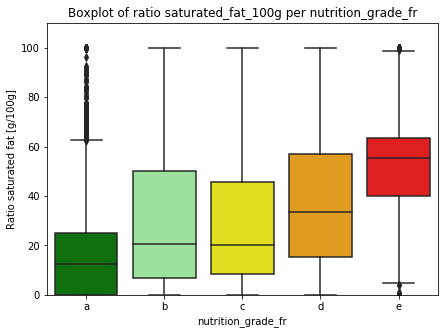

In [51]:
plt.figure(figsize = [7,5])
sb.boxplot(data = df_study_ratio_fat, x = 'nutrition_grade_fr', y = 'ratio_saturated_fat', palette=my_pal)
plt.ylim(0,110)
plt.ylabel('Ratio saturated fat [g/100g]')
plt.title('Boxplot of ratio saturated_fat_100g per nutrition_grade_fr');

In [52]:
df_study_ratio_fat.groupby('nutrition_grade_fr').ratio_saturated_fat.median()

nutrition_grade_fr
a    12.511374
b    20.512821
c    20.000000
d    33.353329
e    55.569384
Name: ratio_saturated_fat, dtype: float64

#### Comments:
>  we observe that when going towards grade 'e', so less healthy, we have an increase of the median of the ratio saturated fat.

#### carbohydrates_100g

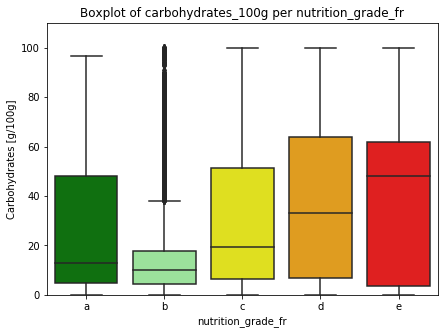

In [53]:
plt.figure(figsize = [7,5])
sb.boxplot(data = df_study, x = 'nutrition_grade_fr', y = 'carbohydrates_100g', palette=my_pal)
plt.ylim(0,110)
plt.ylabel('Carbohydrates [g/100g]')
plt.title('Boxplot of carbohydrates_100g per nutrition_grade_fr');

In [54]:
df_study.groupby('nutrition_grade_fr').carbohydrates_100g.median()

nutrition_grade_fr
a    12.94
b    10.00
c    19.19
d    33.33
e    48.00
Name: carbohydrates_100g, dtype: float64

#### Comments:
>  we observe that when going towards grade 'e', so less healthy, we have an increase of the median carbohydrates level.

#### proteins_100g

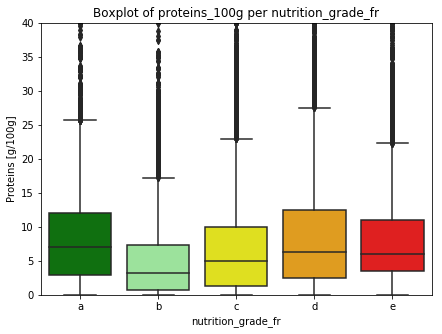

In [55]:
plt.figure(figsize = [7,5])
sb.boxplot(data = df_study, x = 'nutrition_grade_fr', y = 'proteins_100g', palette=my_pal)
plt.ylim(0,40)
plt.ylabel('Proteins [g/100g]')
plt.title('Boxplot of proteins_100g per nutrition_grade_fr');

In [56]:
df_study.groupby('nutrition_grade_fr').proteins_100g.median()

nutrition_grade_fr
a    7.02
b    3.20
c    5.00
d    6.38
e    6.06
Name: proteins_100g, dtype: float64

#### Comments:
>  we observe that when going towards grade 'e', so less healthy, we have an increase of the median protein level.

#### salt_100g

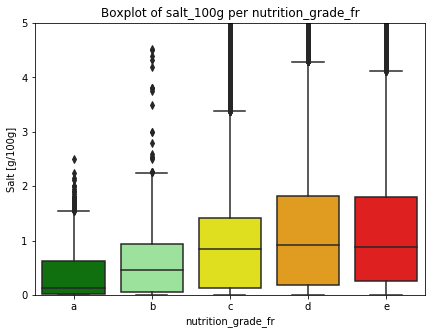

In [57]:
plt.figure(figsize = [7,5])
sb.boxplot(data = df_study, x = 'nutrition_grade_fr', y = 'salt_100g', palette=my_pal)
plt.ylim(0,5)
plt.ylabel('Salt [g/100g]')
plt.title('Boxplot of salt_100g per nutrition_grade_fr');

In [58]:
df_study.groupby('nutrition_grade_fr').salt_100g.median()

nutrition_grade_fr
a    0.13462
b    0.46482
c    0.85000
d    0.91440
e    0.87630
Name: salt_100g, dtype: float64

#### Comments:
>  we observe that when going towards grade 'e', so less healthy, we have an increase of the median salt level.

### FacetGrid energy_100g vs fat_100g for nutri_grade_fr_100g

In [59]:
# plot matrix: sample 5000 aliments so that plots are clearer and
# they render faster
df_samp = df_study.sample(5000)

/usr/local/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


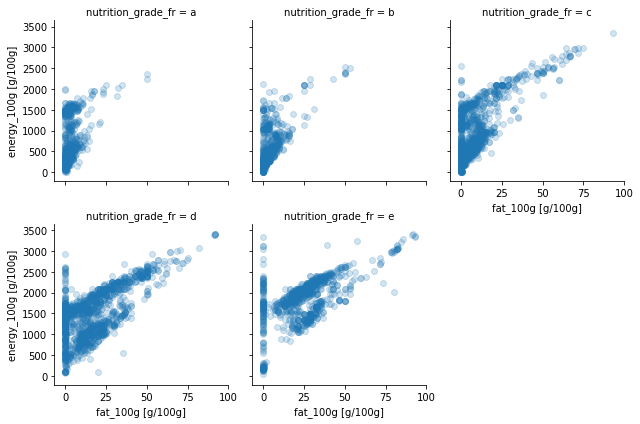

In [60]:
# we'll apply some jitter effect
g = sb.FacetGrid(data = df_samp, col = 'nutrition_grade_fr', col_wrap = 3, size = 3, margin_titles = True)
g.map(plt.scatter, 'fat_100g', 'energy_100g',alpha=1/5)
g.set_xlabels('fat_100g [g/100g]')
g.set_ylabels('energy_100g [g/100g]');